初期人口が少ないほうが協力が進化しやすい。

なぜ、人口が少ないと協力が進化しやすいのか？

人口が少ないと、親子関係の影響が相対的に強くなる。Fig.5 より、親子関係の影響が相対的に強くなると、協力率が上がる。よって、人口が少ないほうが協力が進化しやすくなる。

In [1]:
using DataFrames
using Plots
using StatsBase

include("../src/SimPlot.jl")
using .SimPlot: make_mean_df, csv_to_df

In [2]:
load(dir_name::String)::DataFrame = [dir_name] |> csv_to_df |> make_mean_df

function transform(df::DataFrame)::DataFrame
    @show size(df)
    df.T_S = string.("(", df.T, ", ", df.S, ")")
    df = combine(groupby(df, [:initial_N, :T_S]), :cooperation_rate => mean)
    sort!(df, :T_S)

    return unstack(df, :initial_N, :T_S, :cooperation_rate_mean)
end

function visualize(df::DataFrame, title::String)::Plots.Plot
    return plot(
        df.initial_N,
        [eachcol(df)[2:end]...],
        label = reshape(names(df)[2:end], 1, :),
        legend=:topright,
        lw = 2,
        title = title,
        xl = "Initial population",
        xticks = 200:200:2000,
        yl = "Cooperation rate",
        ylim = (-0.03, 1),
        yticks = 0:0.1:1,
        titlefontsize = 9,
        legendtitle = "(T, S)",
        legendtitlefontsize = 9,
        foreground_color_legend = nothing,
        background_color_legend = nothing,
    )
end

const DIR_TITLE = [
    ("CooperationRateByPopulation1", "Fig.1 Starting with 0% is C"),
    ("CooperationRateByPopulation2", "Fig.2 Starting with 50% is C"),
    ("CooperationRateByPopulation3", "Fig.3 Starting with 100% is C"),
];

size(df) = (210, 32)
size(df) = (210, 32)
size(df) = (210, 32)


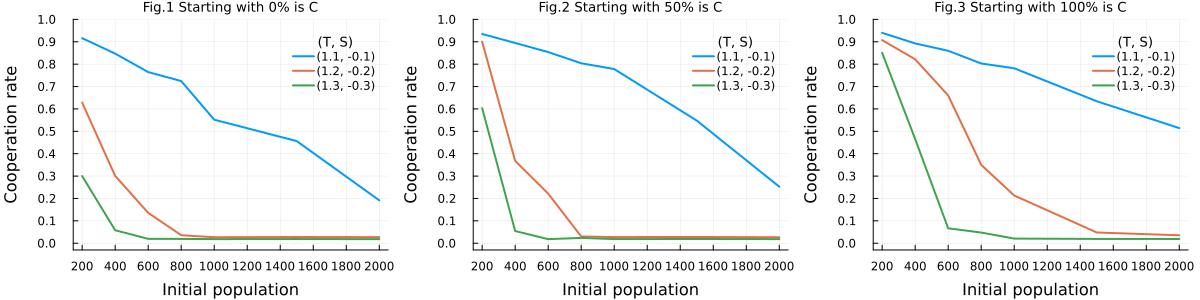

In [3]:
using Plots.PlotMeasures
plot_vec = [load(dir) |> transform |> df -> visualize(df, title) for (dir, title) in DIR_TITLE]
plot(plot_vec..., layout = (1, 3), size = (1200, 300), left_margin = 6mm, bottom_margin = 6mm)

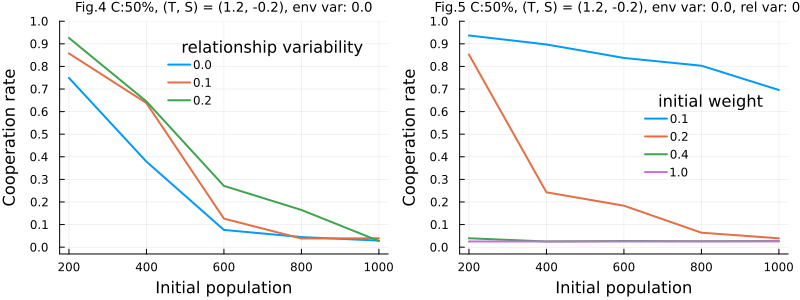

In [4]:
df4 = load("CooperationRateByPopulation4") |>
    df -> combine(groupby(df, [:initial_N, :relationship_volatility]), :cooperation_rate => mean) |>
    df -> unstack(df, :initial_N, :relationship_volatility, :cooperation_rate_mean)

df5 = load("CooperationRateByPopulation5") |>
    df -> combine(groupby(df, [:initial_N, :initial_graph_weight]), :cooperation_rate => mean) |>
    df -> unstack(df, :initial_N, :initial_graph_weight, :cooperation_rate_mean)

function visualize4n5(df::DataFrame, title::String, legend_position::Symbol, legendtitle::String)::Plots.Plot
    return plot(
        df.initial_N,
        [eachcol(df)[2:end]...],
        label = reshape(names(df)[2:end], 1, :),
        legend = legend_position,
        lw = 2,
        title = title,
        xl = "Initial population",
        xticks = 200:200:1000,
        yl = "Cooperation rate",
        ylim = (-0.03, 1),
        yticks = 0:0.1:1,
        titlefontsize = 9,
        legendtitle = legendtitle,
        foreground_color_legend = nothing,
        background_color_legend = nothing,
    )
end

plot(
    visualize4n5(df4, "Fig.4 C:50%, (T, S) = (1.2, -0.2), env var: 0.0", :topright, "relationship variability"),
    visualize4n5(df5, "Fig.5 C:50%, (T, S) = (1.2, -0.2), env var: 0.0, rel var: 0.0", :right, "initial weight"),
    layout = (1, 2),
    size = (800, 300),
    left_margin = 3mm,
    bottom_margin = 4mm
)